In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.5 MB/s 
     |████████████████████████████████| 6.3 MB 37.6 MB/s 
     |████████████████████████████████| 16.7 MB 192 kB/s 


In [3]:
! git clone https://github.com/joncutrer/geopandas-tutorial.git

Cloning into 'geopandas-tutorial'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 48 (delta 19), reused 39 (delta 14), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [2]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

# 1 State level

In [4]:
states = geopandas.read_file('geopandas-tutorial/data/usa-states-census-2014.shp')
states = states.to_crs("EPSG:3395")
states['name_lower'] = states['NAME'].str.lower()

In [5]:
df = pd.read_csv("the_state_mis.csv", header=0)
df_index_weight = df[['state','mis_index_weight']]
df_index_weight = df_index_weight.set_index(['state'])

In [7]:
merged = states.set_index('name_lower').join(df_index_weight)

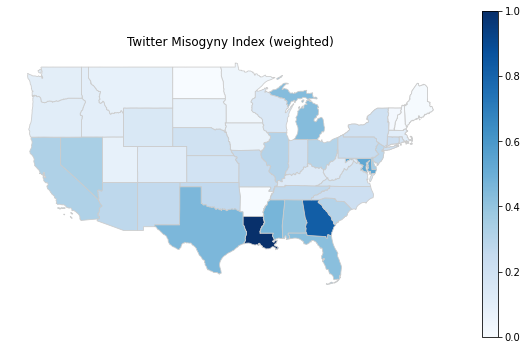

In [15]:
variable = 'mis_index_weight'
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax = ax, edgecolor='0.8')

ax.axis('off')
ax.set_title('Twitter Misogyny Index (weighted)')

sm = plt.cm.ScalarMappable(cmap='Blues')
sm._A = []
cbar = fig.colorbar(sm)

In [17]:
df_index_count = df[['state','mis_index_count']]
df_index_count = df_index_count.set_index(['state'])

merged = states.set_index('name_lower').join(df_index_count)

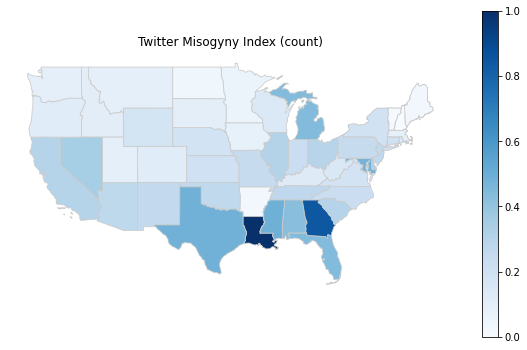

In [18]:
variable = 'mis_index_count'
fig, ax = plt.subplots(1, figsize=(10, 6))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax = ax, edgecolor='0.8')

ax.axis('off')
ax.set_title('Twitter Misogyny Index (count)')

sm = plt.cm.ScalarMappable(cmap='Blues')
sm._A = []
cbar = fig.colorbar(sm)

In [ ]:
df_gap = df[['Unnamed: 0','women_prop']]
df_gap = df_gap.rename(columns={"Unnamed: 0": "state"})
df_gap = df_gap.set_index(['state'])

In [ ]:
merged1 = states.set_index('name_lower').join(df_gap)

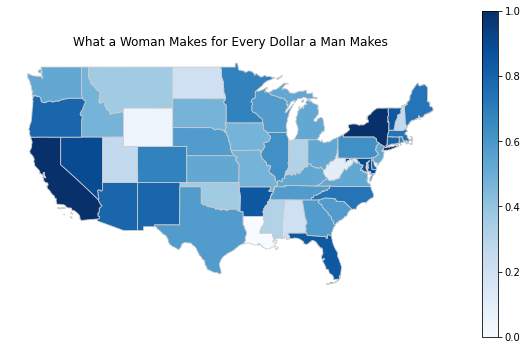

In [ ]:
variable = 'women_prop'
fig, ax = plt.subplots(1, figsize=(10, 6))
merged1.plot(column=variable, cmap='Blues', linewidth=0.8, ax = ax, edgecolor='0.8')

ax.axis('off')
ax.set_title('What a Woman Makes for Every Dollar a Man Makes')

sm = plt.cm.ScalarMappable(cmap='Blues')
sm._A = []
cbar = fig.colorbar(sm)

# 2 County level

In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

In [ ]:
! pip install geoplot

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


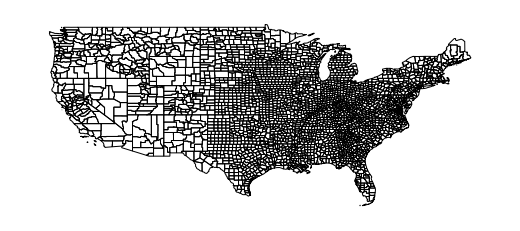

In [49]:
# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));

In [51]:
geoData['county_lower'] = geoData['NAME'].apply(lambda x: x.lower())

In [36]:
df = pd.read_csv('the_county_mis.csv')

In [38]:
df.head(5)

,state,county,weight,count,state.1,n_the_tweets,mis_index_weight,mis_index_count
0,alabama,chilton,1.000000,1,NaN,NaN,NaN,NaN
1,alabama,crenshaw,6.079271,7,1.0,1.0,6.079271,7.000000
2,alabama,cullman,5.353658,12,5.0,5.0,1.070732,2.400000
3,alabama,geneva,3.000000,3,18.0,18.0,0.166667,0.166667
4,alabama,mobile,259.280719,394,240.0,240.0,1.080336,1.641667


In [63]:
df_index_weight = df[['county','mis_index_weight']]
df_index_weight = df_index_weight.set_index(['county'])
df_index_weight = df_index_weight.dropna()

In [67]:
fullData = geoData.merge(df_index_weight, how='left', left_on=['county_lower'], right_index=True)

In [70]:
fullData = fullData.fillna(-1)

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


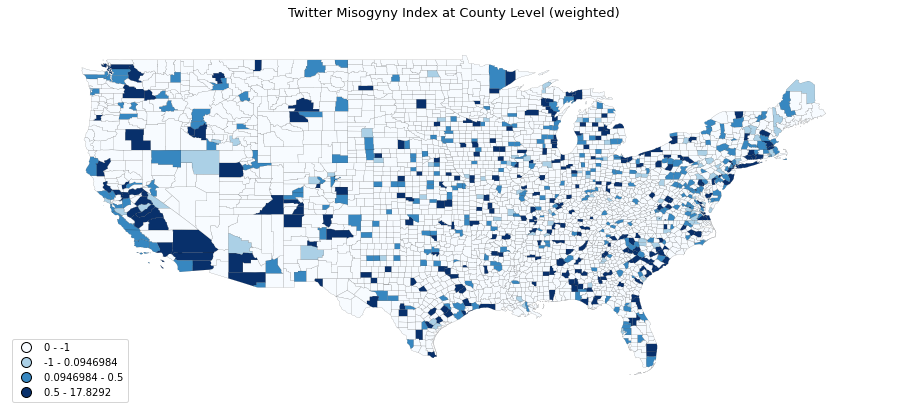

In [75]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 20))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['mis_index_weight'], k=10)

# Map
gplt.choropleth(fullData, 
    hue="mis_index_weight", 
    linewidth=.1,
    scheme=scheme, cmap='Blues',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Twitter Misogyny Index at County Level (weighted)', fontsize=13);

In [81]:
df_index_count = df[['county','mis_index_count']]
df_index_count = df_index_count.set_index(['county'])
df_index_count = df_index_count.dropna()

In [83]:
fullData = geoData.merge(df_index_count, how='left', left_on=['county_lower'], right_index=True)

In [84]:
fullData = fullData.fillna(-1)

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


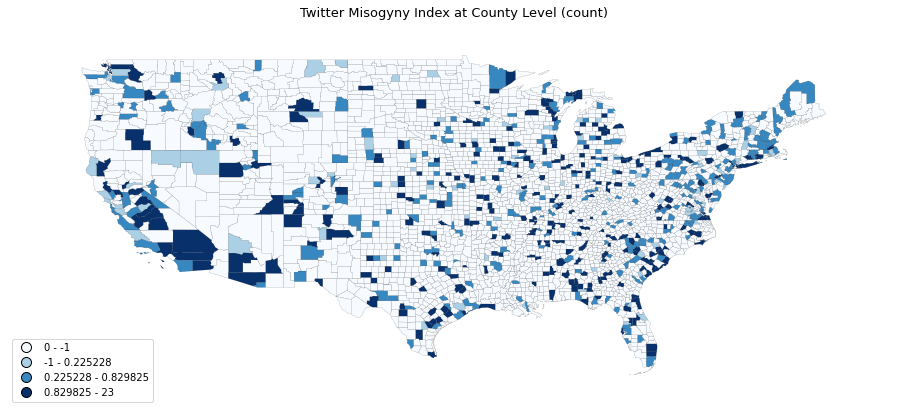

In [85]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 20))

# Set up the color sheme:
import mapclassify as mc
scheme = mc.Quantiles(fullData['mis_index_count'], k=10)

# Map
gplt.choropleth(fullData, 
    hue="mis_index_count", 
    linewidth=.1,
    scheme=scheme, cmap='Blues',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Twitter Misogyny Index at County Level (count)', fontsize=13);

# 3 City level

In [86]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc

continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

In [90]:
continental_usa_cities

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)
...,...,...,...,...,...
3661,38128,2565635.0,49.0,NY,POINT (-73.94956 40.65009)
3662,38129,2272771.0,39.0,NY,POINT (-73.79745 40.75016)
3663,38130,470728.0,164.0,NY,POINT (-74.14981 40.58328)
3664,38138,28712.0,187.0,MA,POINT (-71.33303 41.98405)


In [92]:
us_cities = pd.read_csv('us_cities.csv')

In [93]:
us_cities

,ID,STATE_CODE,STATE_NAME,CITY,COUNTY,LATITUDE,LONGITUDE
0,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778
1,2,AK,Alaska,Akiachak,Bethel,60.891854,-161.392330
2,3,AK,Alaska,Akiak,Bethel,60.890632,-161.199325
3,4,AK,Alaska,Akutan,Aleutians East,54.143012,-165.785368
4,5,AK,Alaska,Alakanuk,Kusilvak,62.746967,-164.602280
...,...,...,...,...,...,...,...
29875,29876,WY,Wyoming,Worland,Washakie,44.013796,-107.956260
29876,29877,WY,Wyoming,Wright,Campbell,43.829349,-105.532327
29877,29878,WY,Wyoming,Wyarno,Sheridan,44.813333,-106.773333
29878,29879,WY,Wyoming,Yellowstone National Park,Park,44.853913,-110.674366


In [98]:
continental_usa_cities['id_int'] = continental_usa_cities['id'].astype(str).astype(int)

In [99]:
continental_usa_cities = continental_usa_cities.merge(us_cities, how='left',left_on='id_int',right_on='ID')

In [102]:
continental_usa_cities[['STATE','STATE_NAME']]

,STATE,STATE_NAME
0,ND,Alaska
1,ND,Alaska
2,ND,Alaska
3,ND,Alaska
4,ND,Alaska
...,...,...
3611,NY,NaN
3612,NY,NaN
3613,NY,NaN
3614,MA,NaN


In [ ]:
df = pd.read_csv('the_city_mis')
df_index_weight = df[['city','mis_index_weight']]
df_index_weight = df_index_weight.set_index(['city'])
df_index_weight = df_index_weight.dropna()

In [ ]:

scheme = mc.Quantiles(fullData['mis_index_count'], k=10)
scheme = mc.Quantiles(continental_usa_cities['POP_2010'], k=5)

ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(12, 7)
)
gplt.pointplot(
    continental_usa_cities,
    scale='POP_2010',
    limits=(2, 30),
    hue='POP_2010',
    cmap='Blues',
    scheme=scheme,
    legend=True,
    legend_var='scale',
    legend_values=[8000000, 2000000, 1000000, 100000],
    legend_labels=['8 million', '2 million', '1 million', '100 thousand'],
    legend_kwargs={'frameon': False, 'loc': 'lower right'},
    ax=ax
)

plt.title("Large cities in the contiguous United States, 2010")